In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

Описание набора данных: 
Red Wine Quality - Качество красного вина 

fixed acidity - фиксированная кислотность
volatile acidity - летучая кислотность
citric acid - лимонная кислота
residual sugar - остаточный сахар
chlorides - хлориды
free sulfur dioxide - свободный диоксид серы
total sulfur dioxide - общий диоксид серы
density - плотность
pH: уровень кислотности или щелочности
sulphates - содержание сульфатов
alcohol - содержание алкоголя
quality - оценка качества 

Ссылка на источник: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

Выбранная задача: 
Задача регрессии (оценка целевого признака из области действительных чисел). Построить не менее 3 моделей (линейная, дерево и KNN).

Целевая переменная:avgdeathsperyear
 

Выполнил: Заякин Евгений ПМИ-1

In [33]:
#Задачи с 1 по 5 выше и это 
# Загрузка данных из CSV файла в датафрейм
data = pd.read_csv("cancer_reg.csv")

# Вывод статистической информации о наборе данных
data.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [34]:
#6. Вывести названия столбцов и строк.
print("Названия столбцов:")
print(data.columns)

print("\nДатасет:")
print(data.head(10))

Названия столбцов:
Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

Датасет:
   avganncount  avgdeathsperyear  target_deathrate  incidencerate  medincome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          34

In [35]:
#7. Заменить или удалить пропущенные значения
data.dropna(axis=0, inplace=True)
data.drop(columns=['geography'], inplace=True)

8. Заменить категориальные данные количественными, пропускаем, так как  таких данных нет

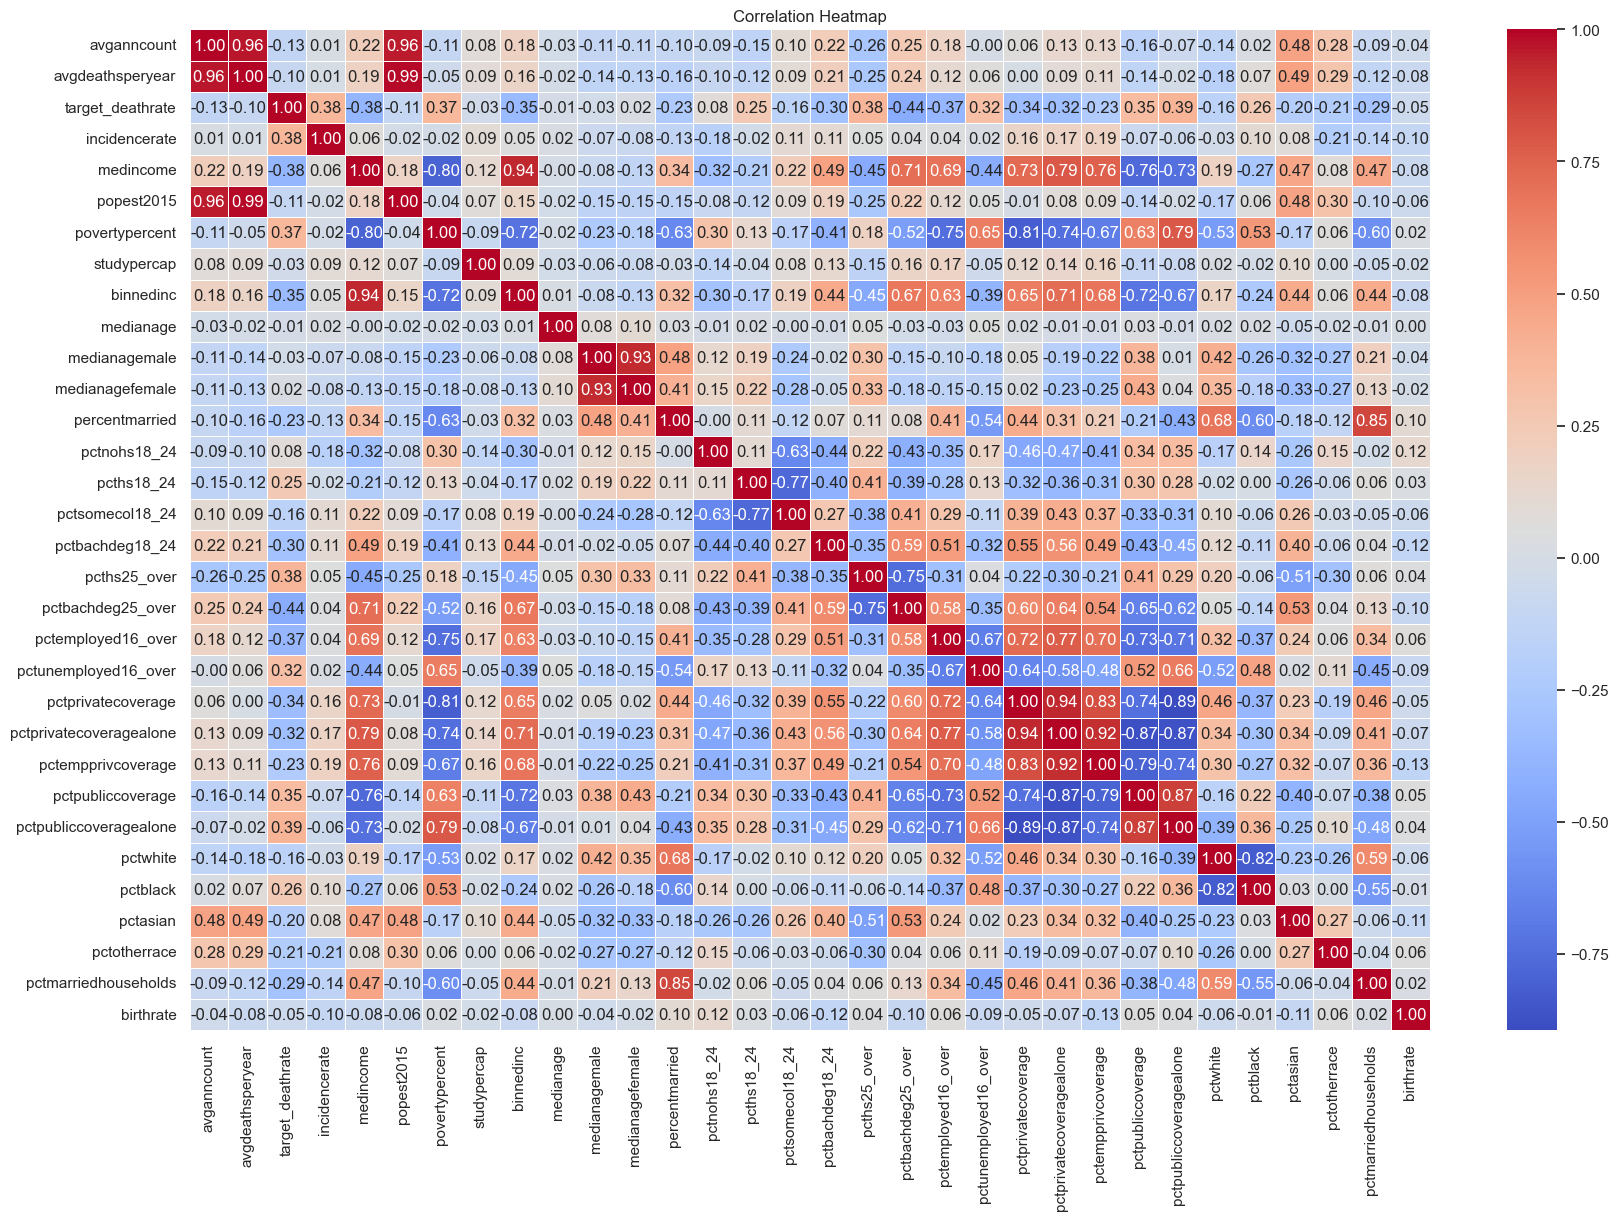

In [36]:
#9. Выбрать важные признаки с помощью корреляционного анализа (оценить их влияние на значение целевого признака в задачах регрессии и классификации).
data['binnedinc'] = data['binnedinc'].apply(lambda x: np.mean([float(val) for val in x.strip('()[]').split(',')]) if isinstance(x, str) else x)
corr_matrix = data.corr()
plt.figure(figsize=(20, 13))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#Пирсон 

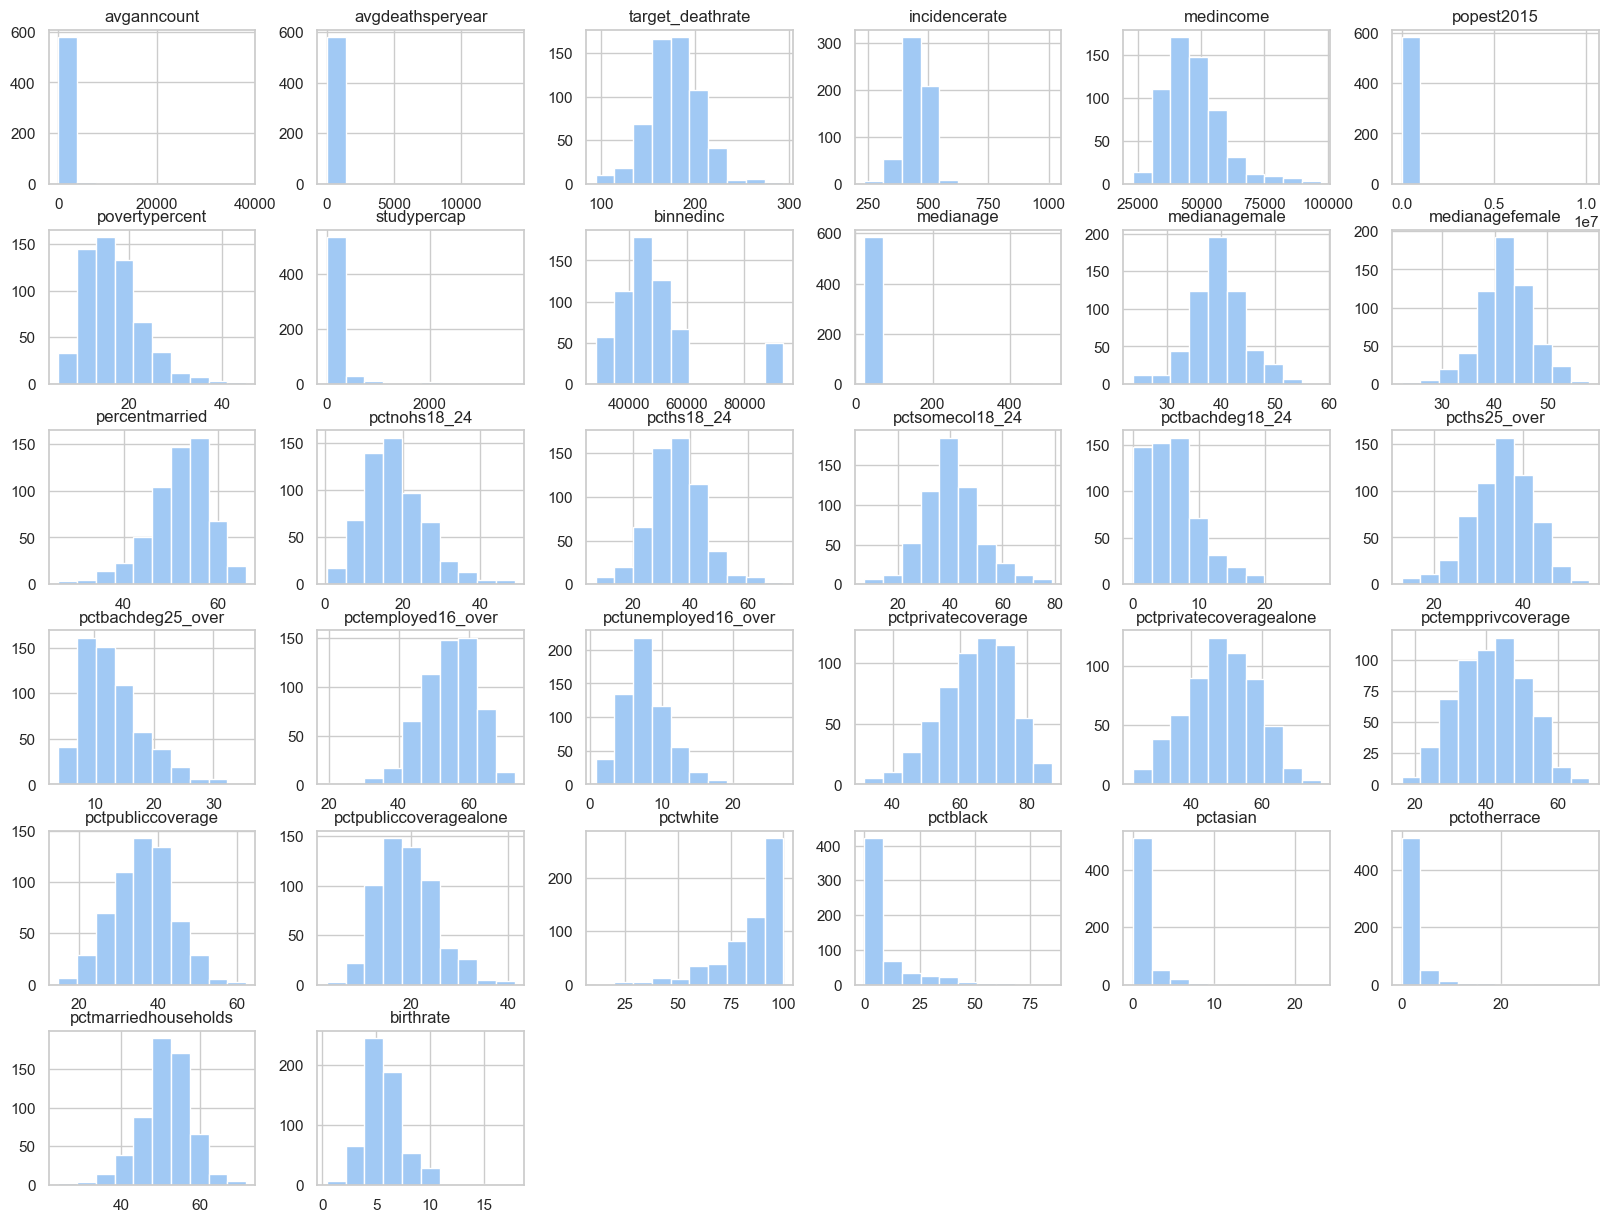

In [37]:
#11. Визуализировать данные с помощью Matplotlib и Seaborn.    горизонтальное ось, матрица корреляции фамилия
data.hist(figsize=(20,15))
plt.xlabel('Значения', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.show()

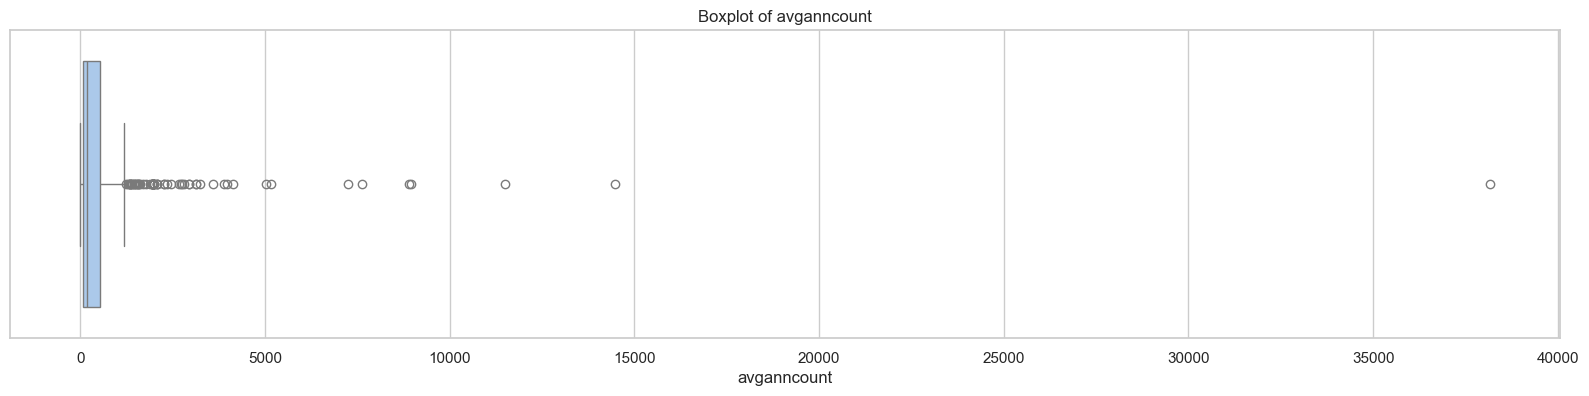

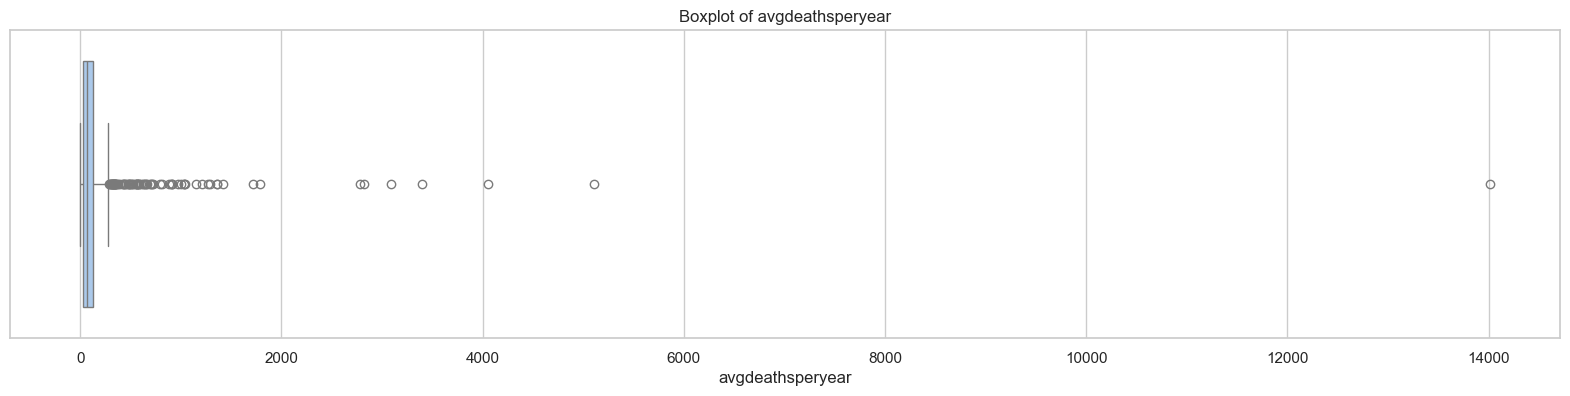

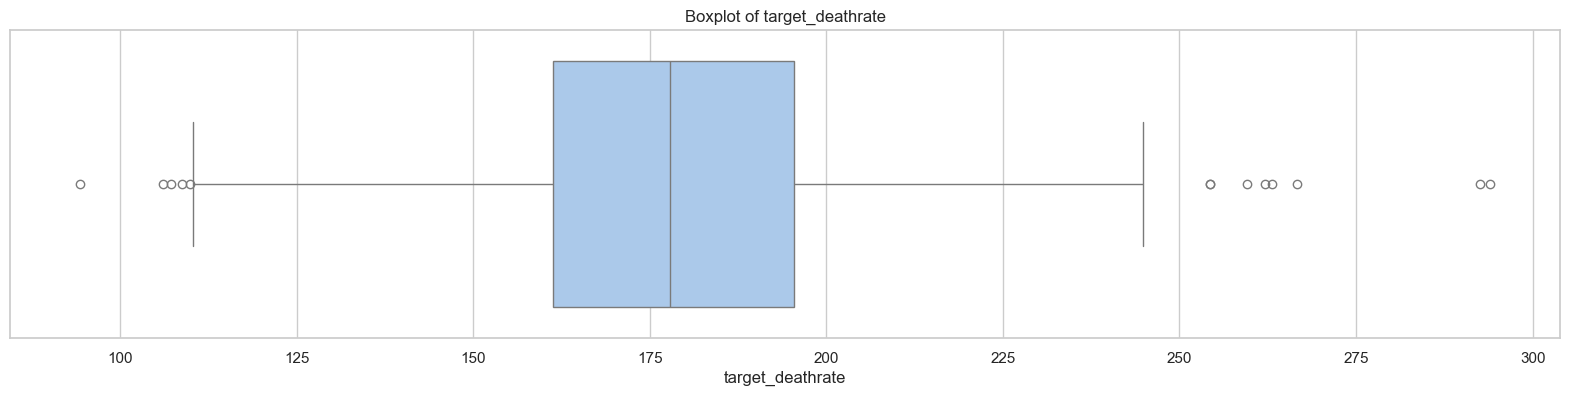

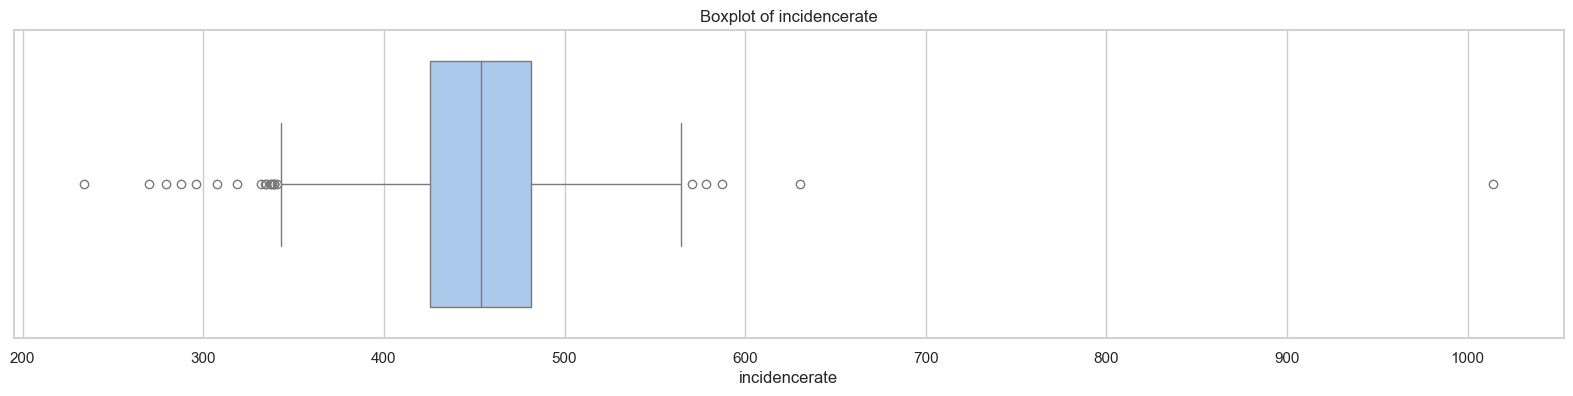

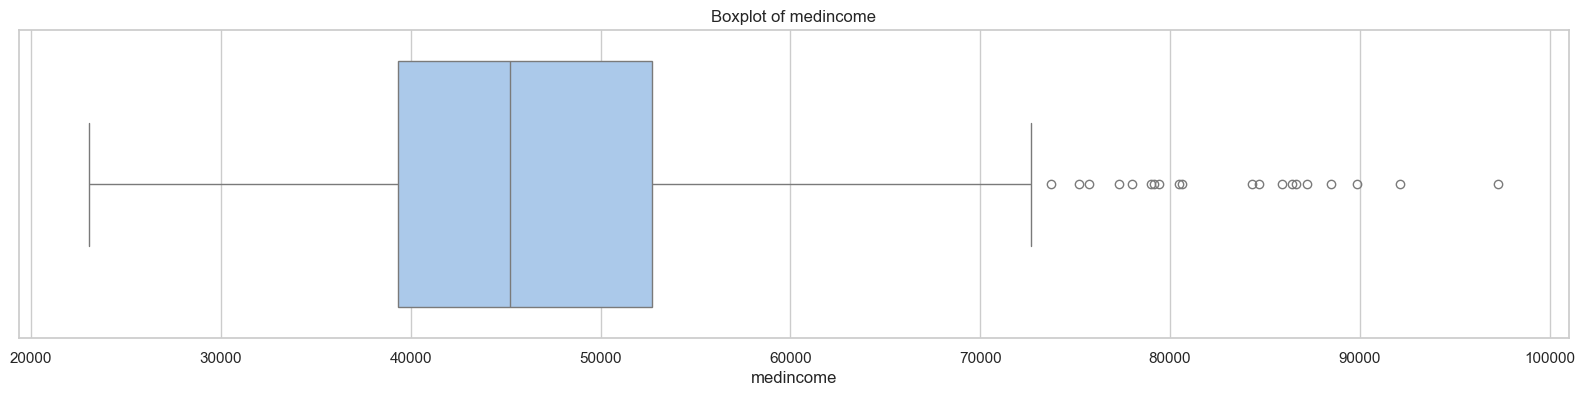

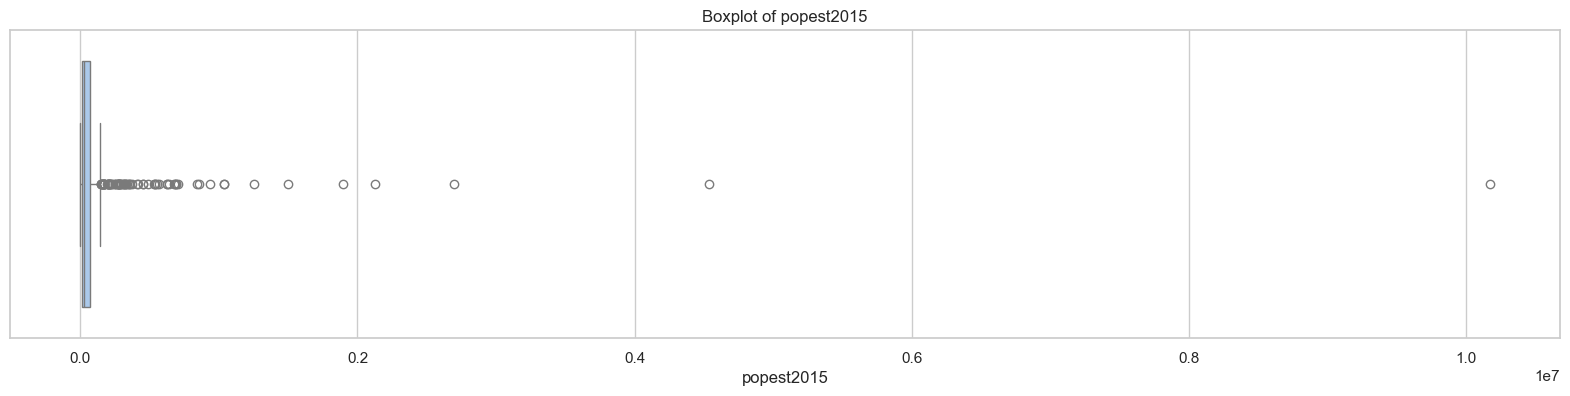

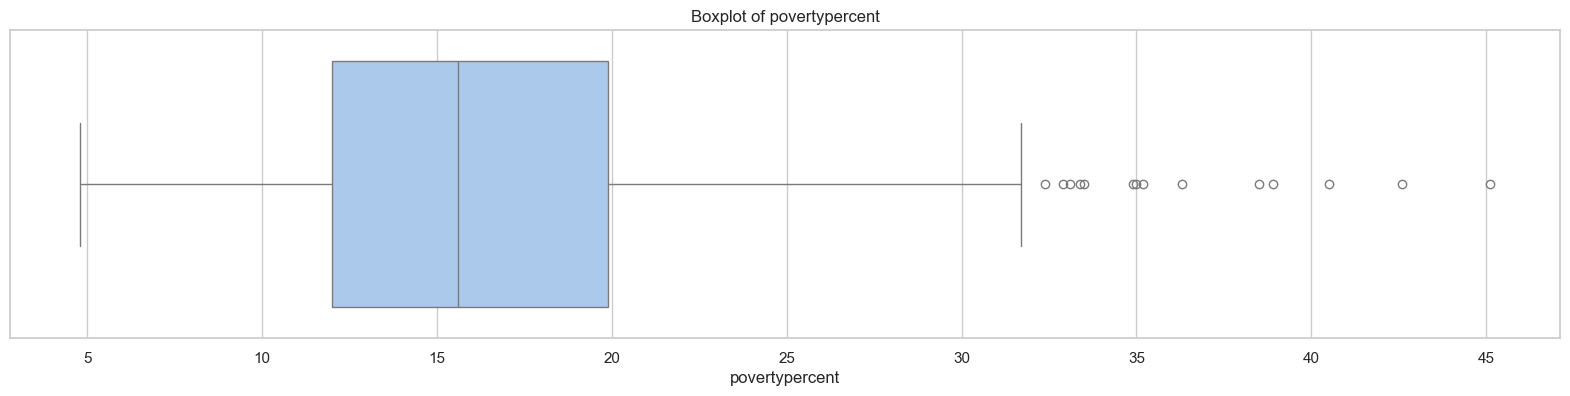

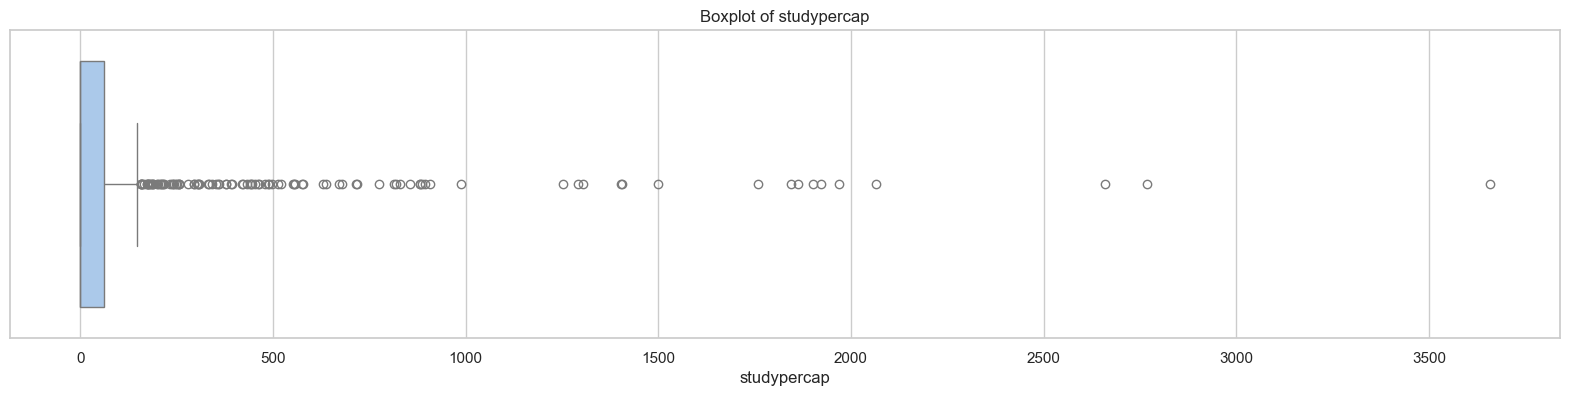

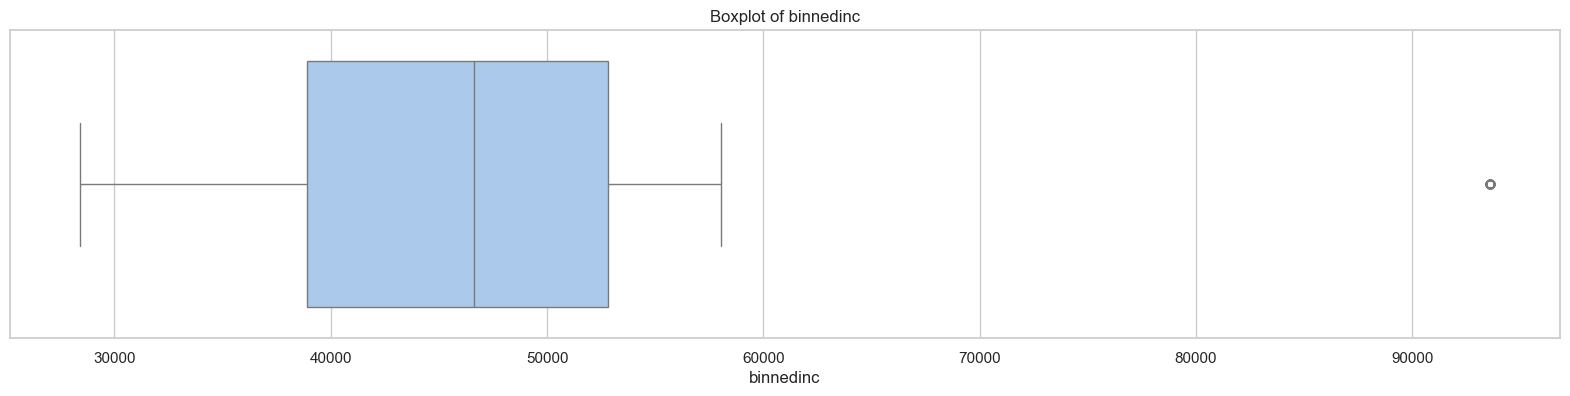

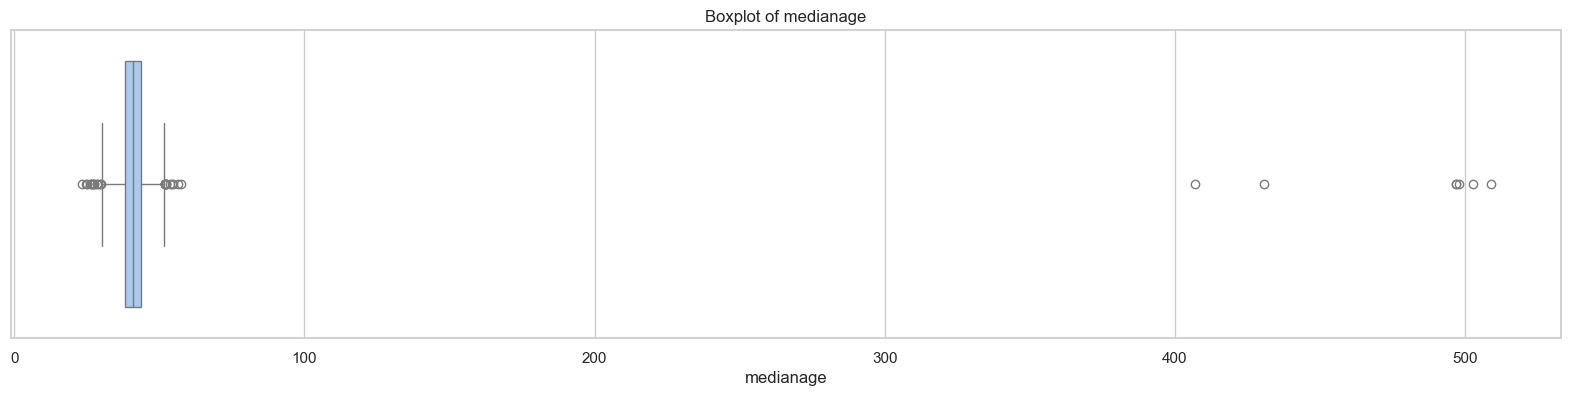

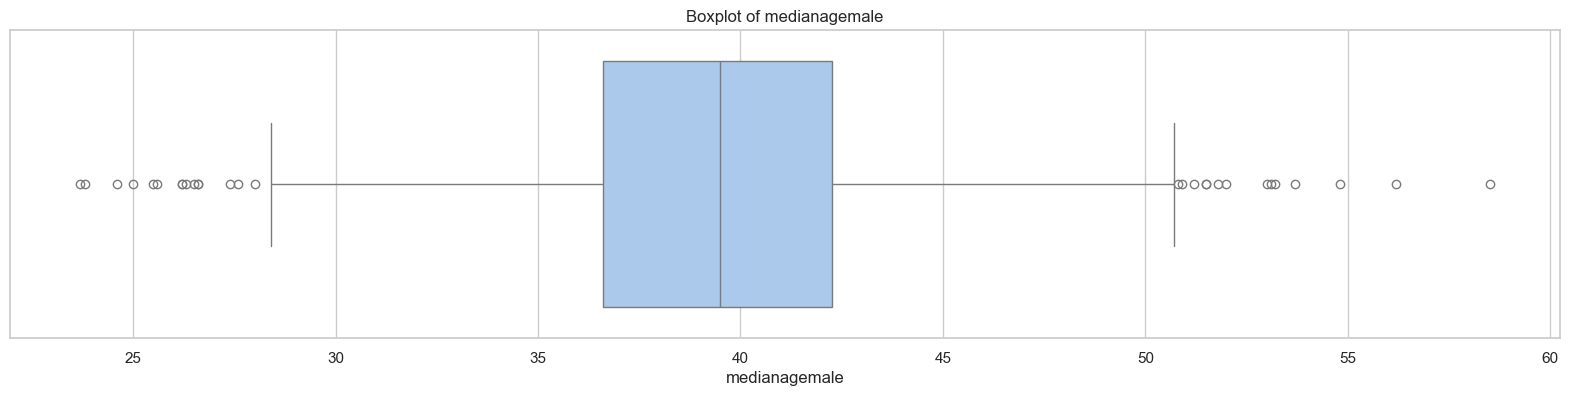

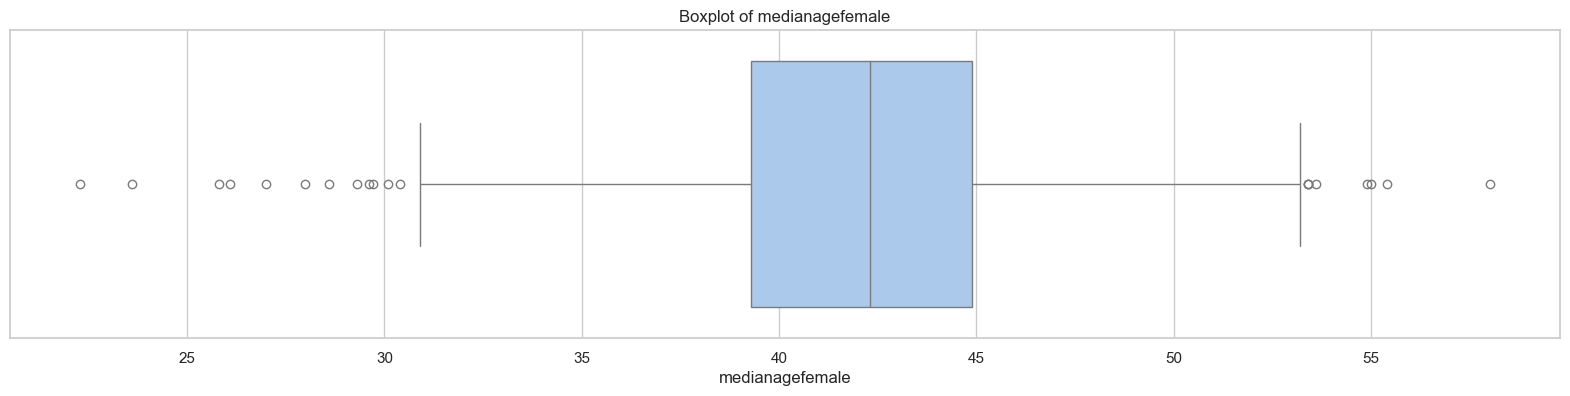

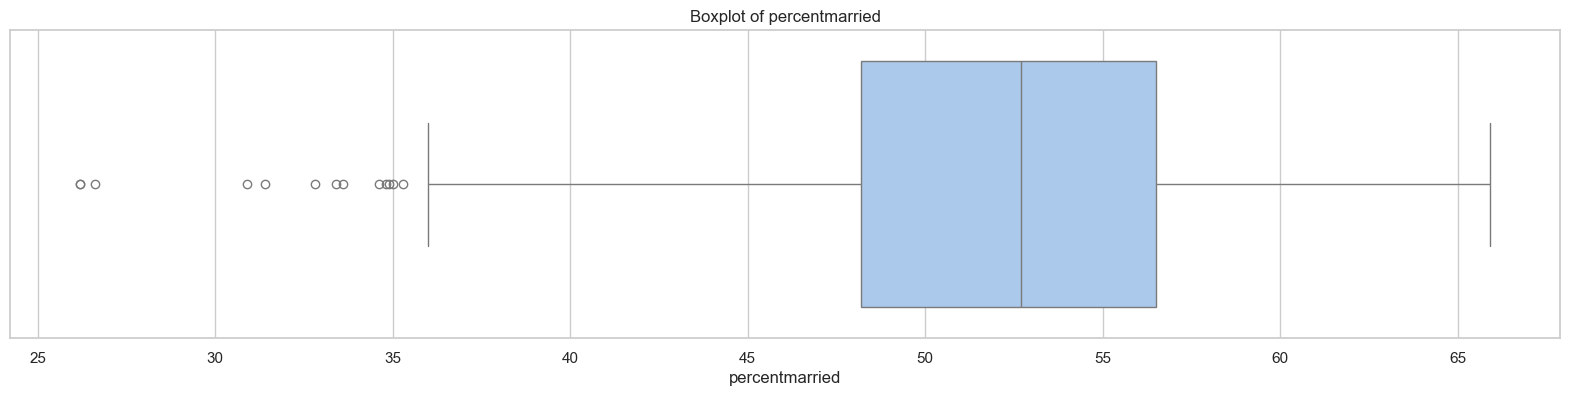

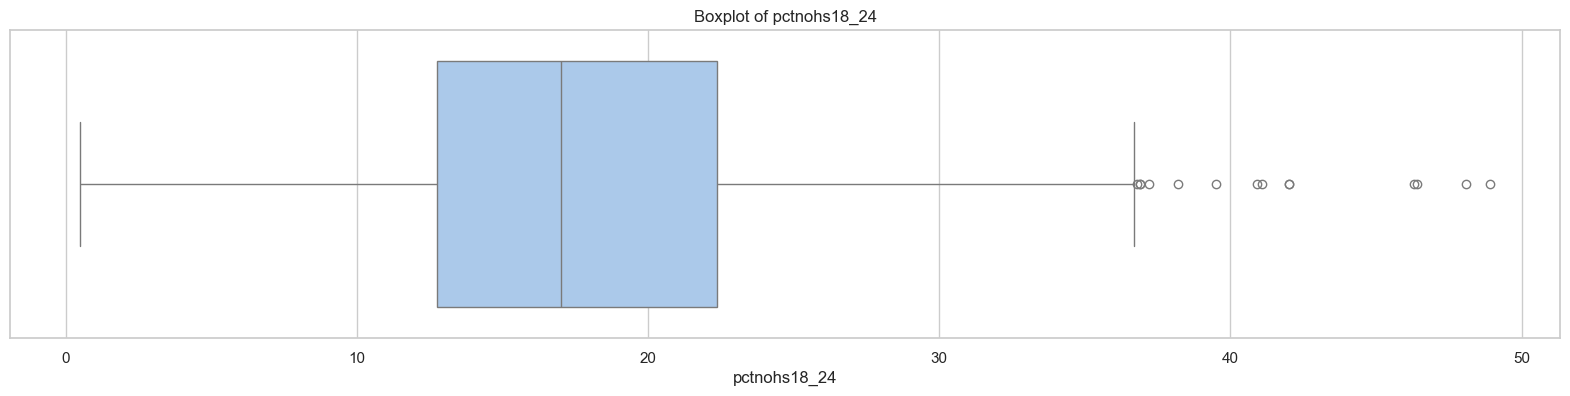

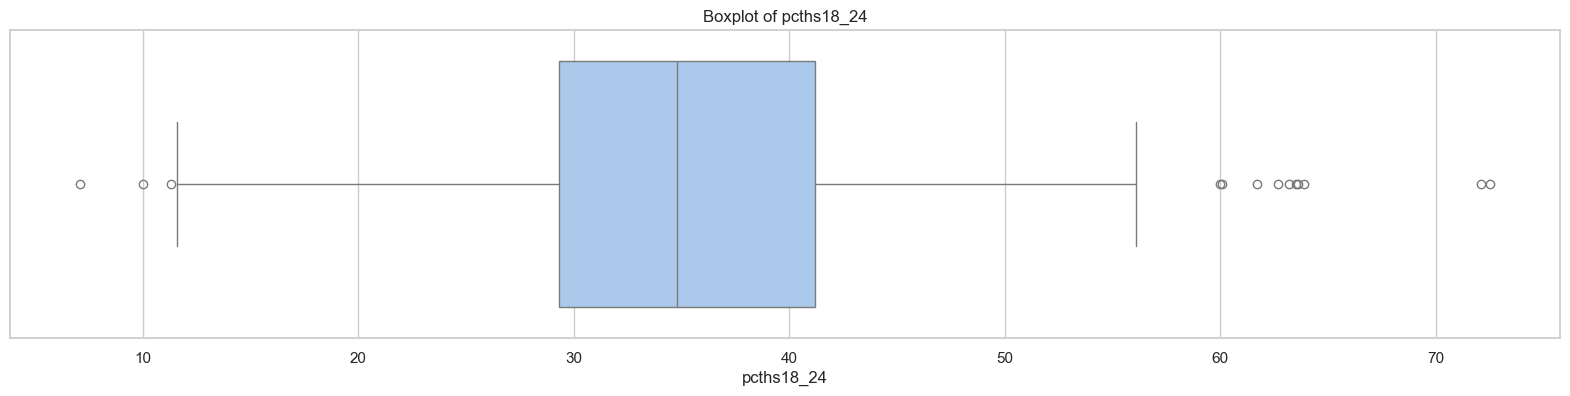

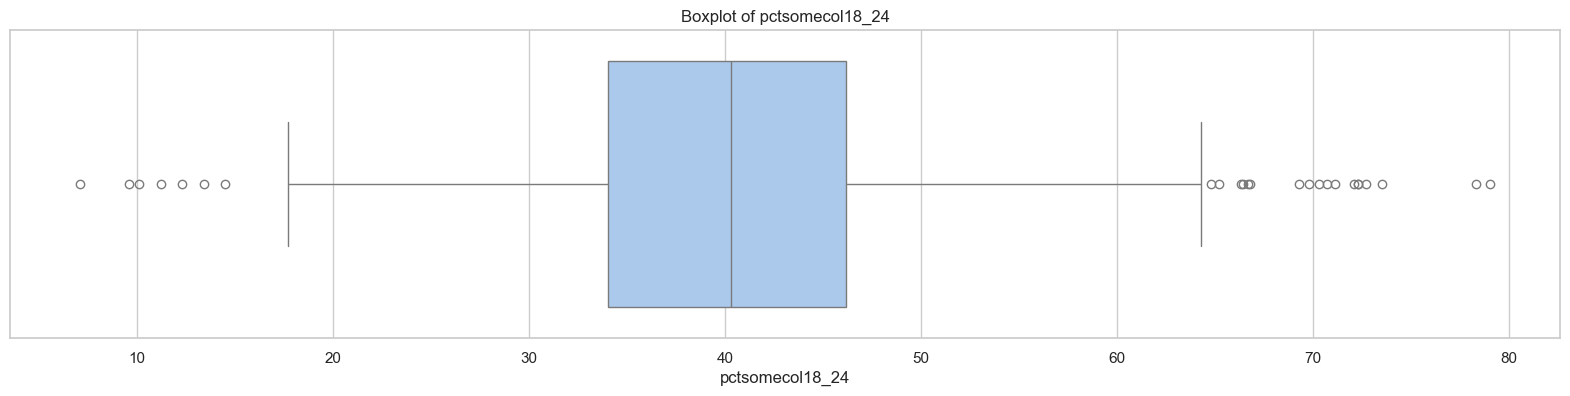

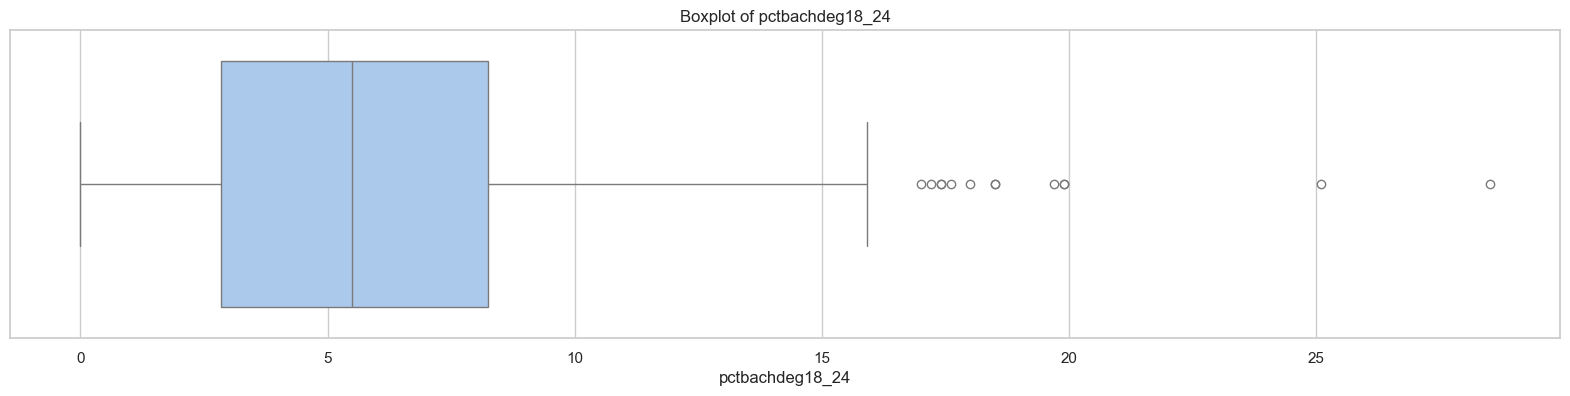

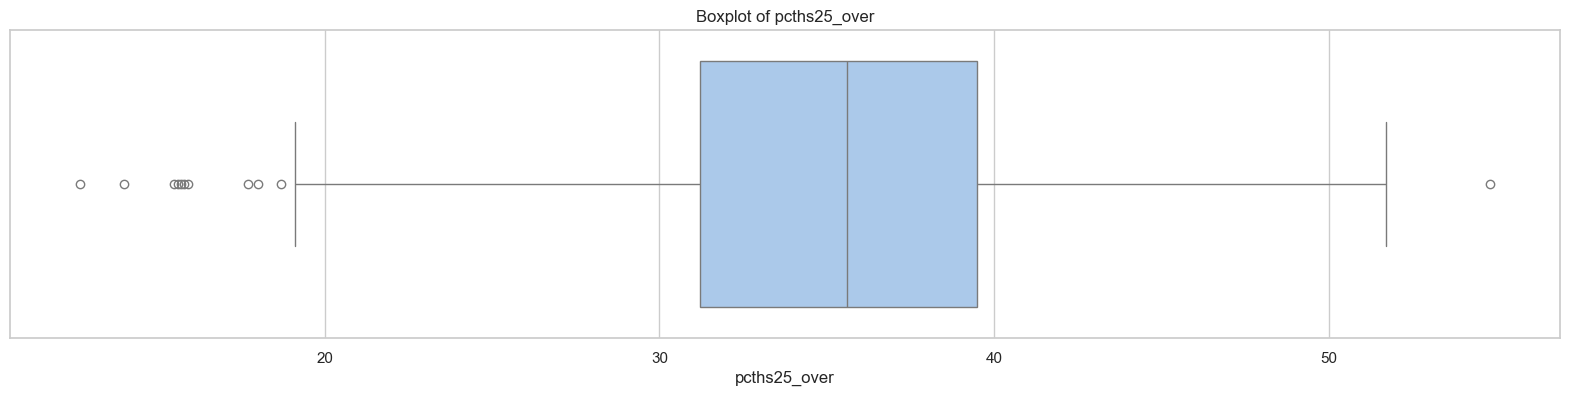

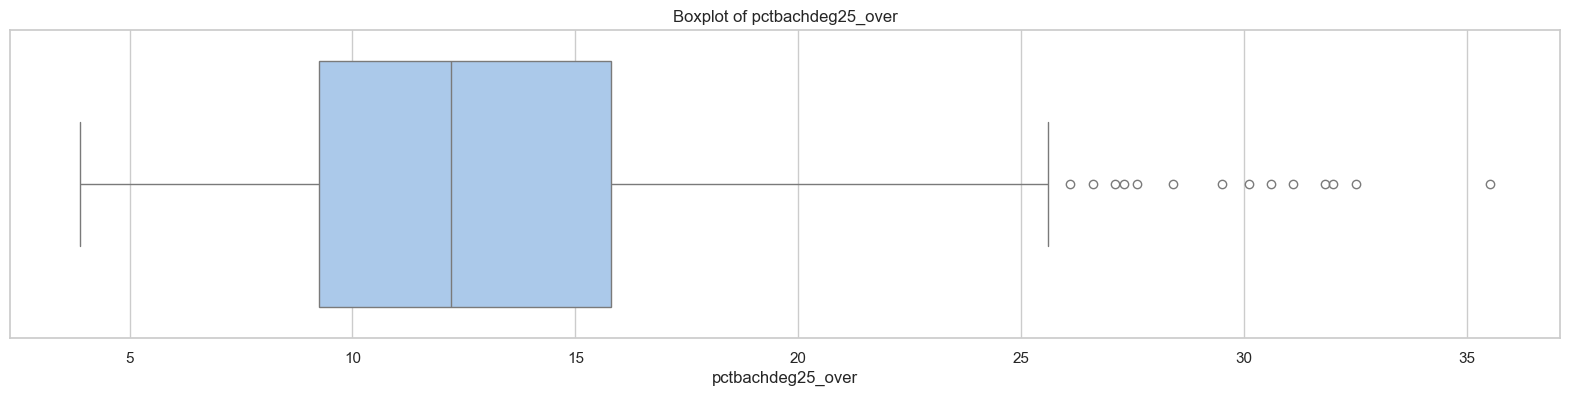

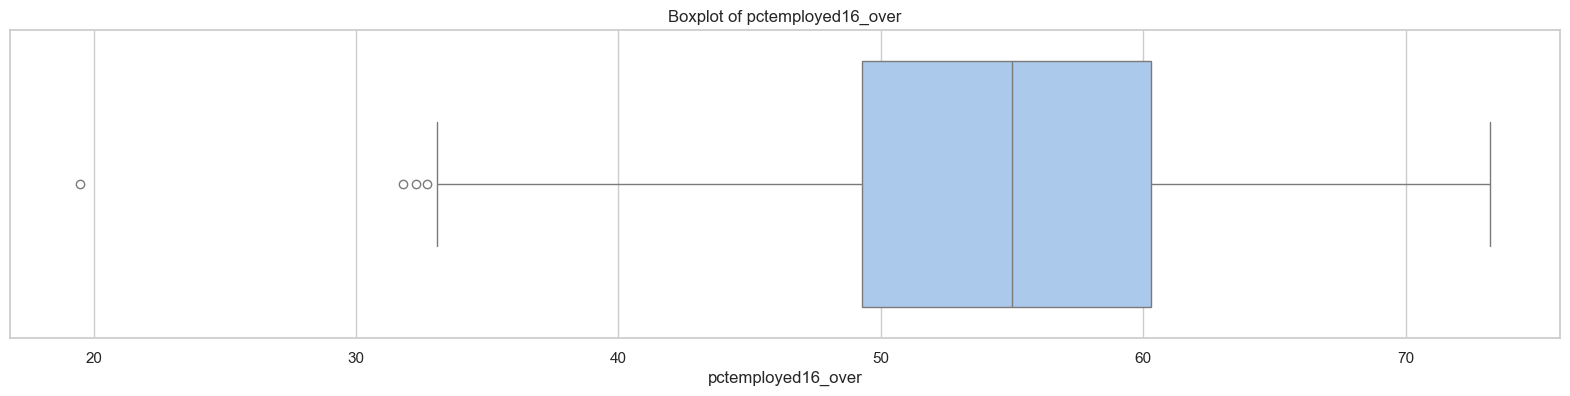

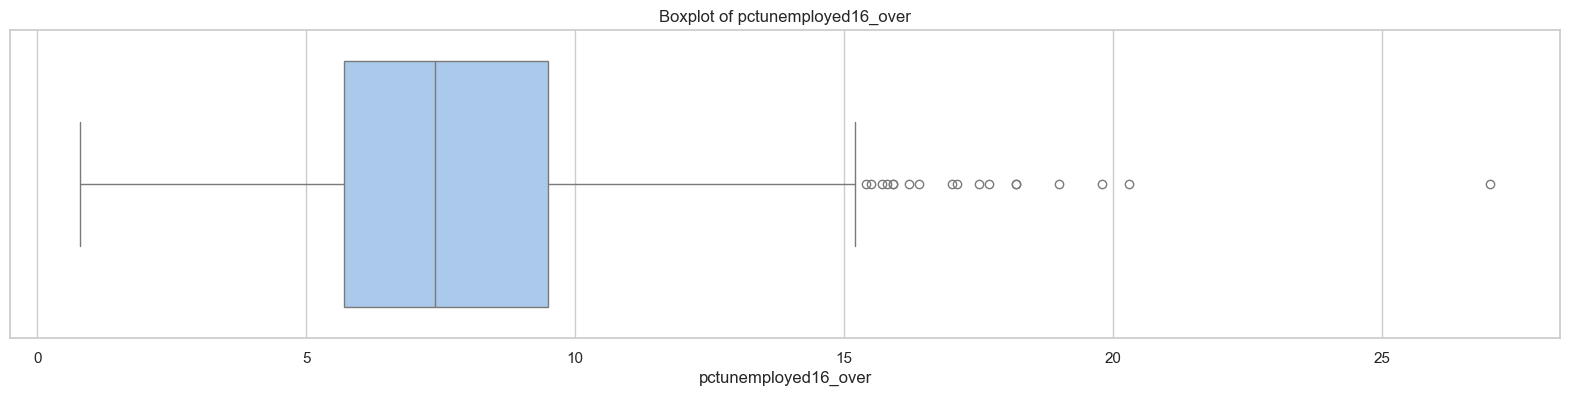

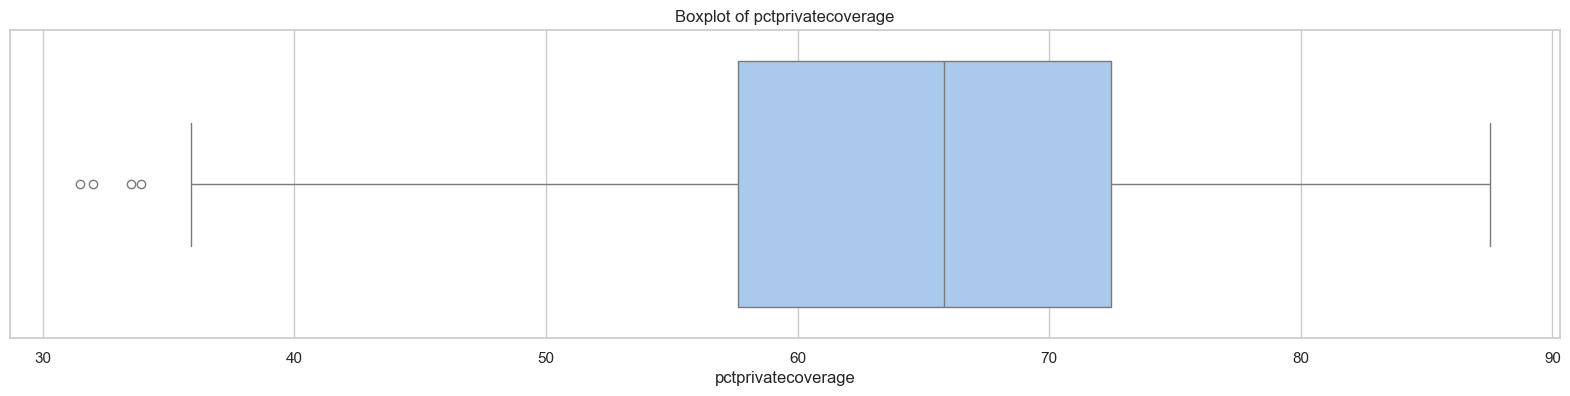

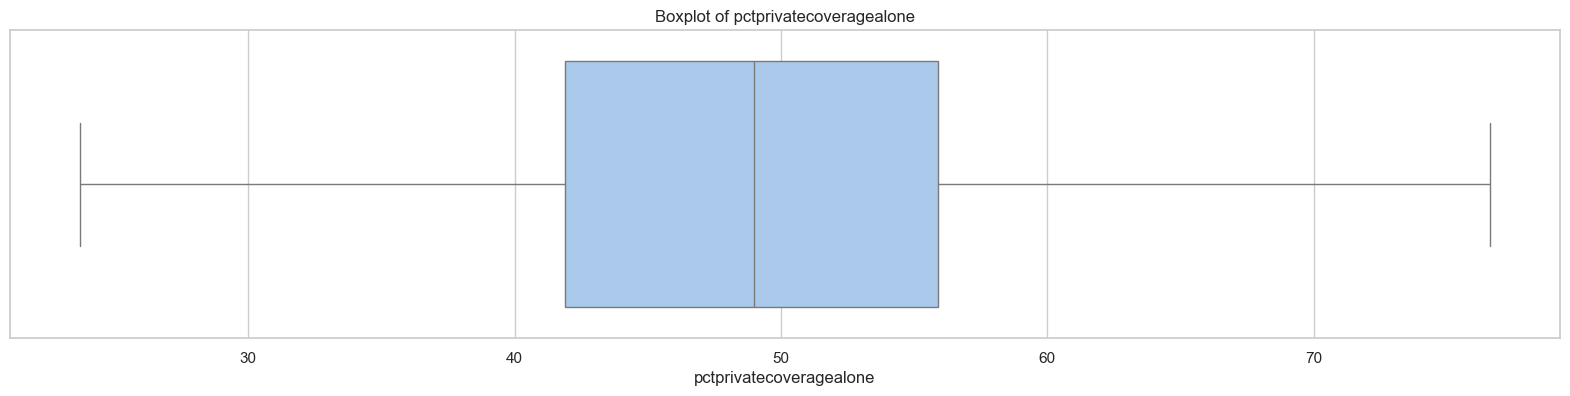

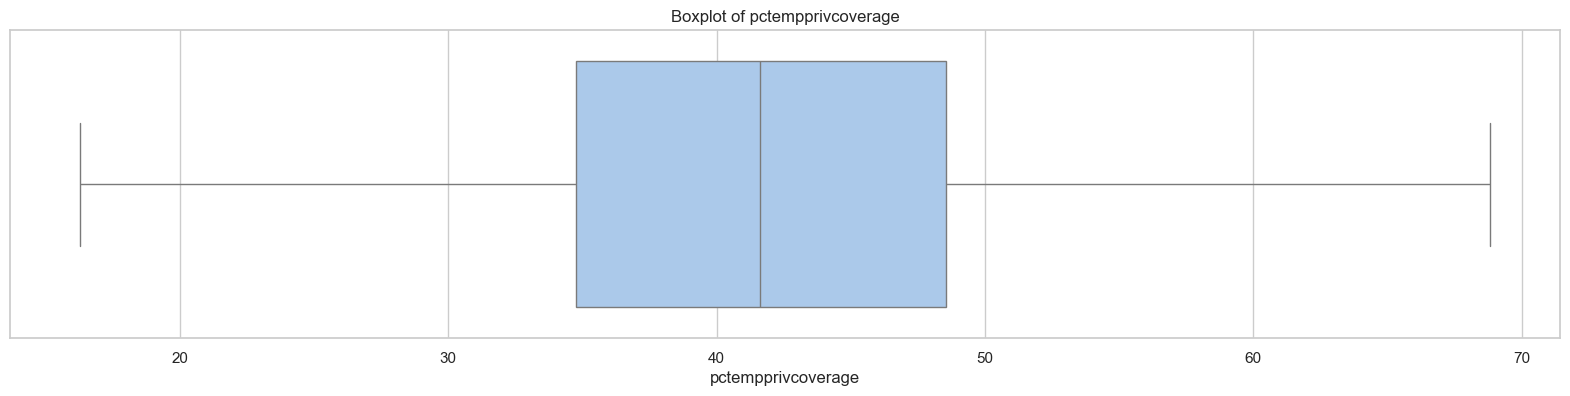

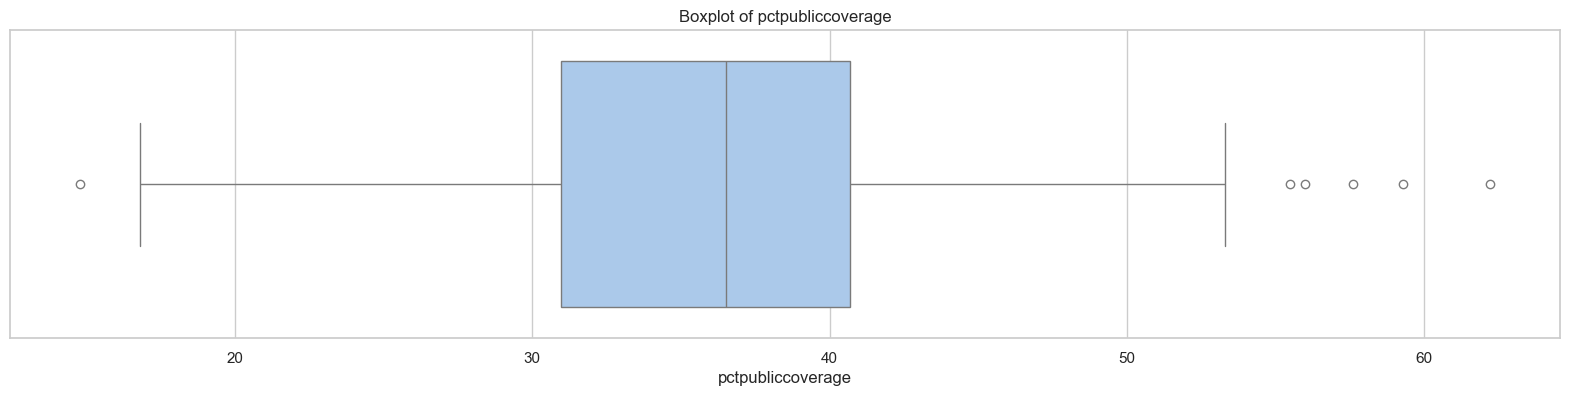

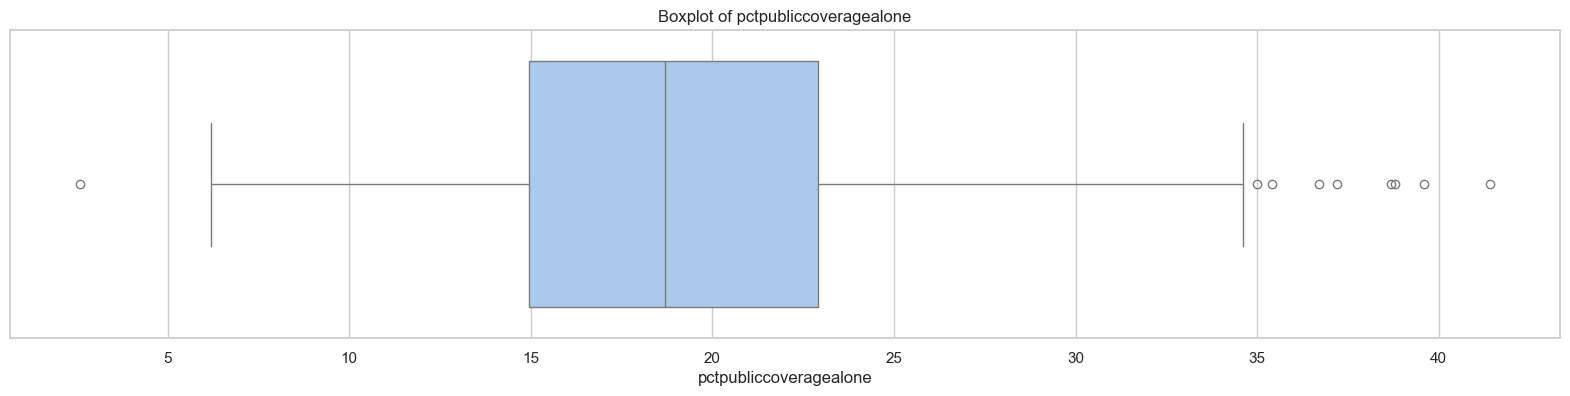

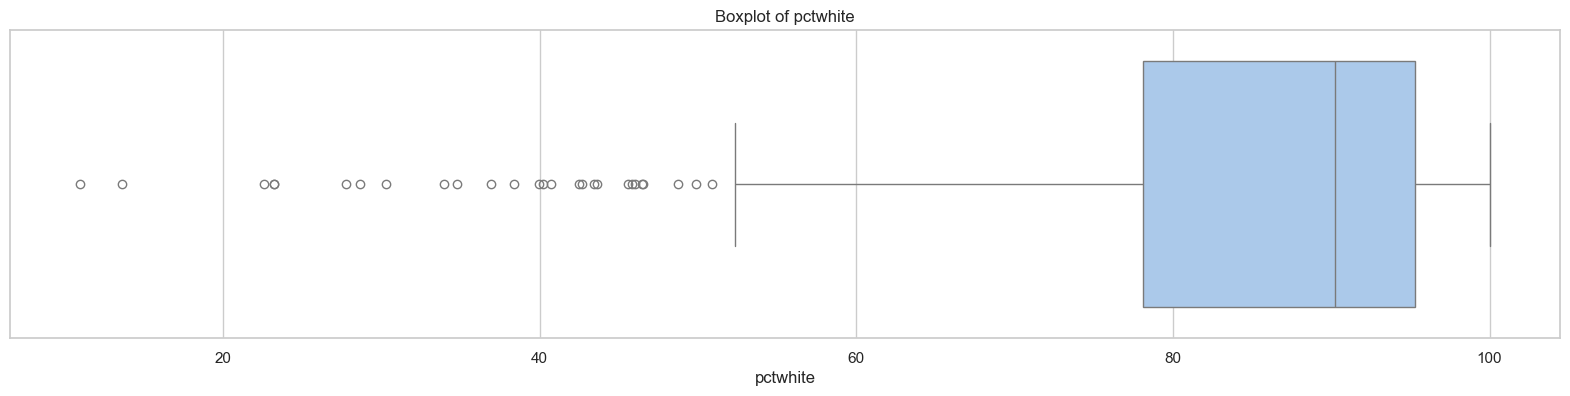

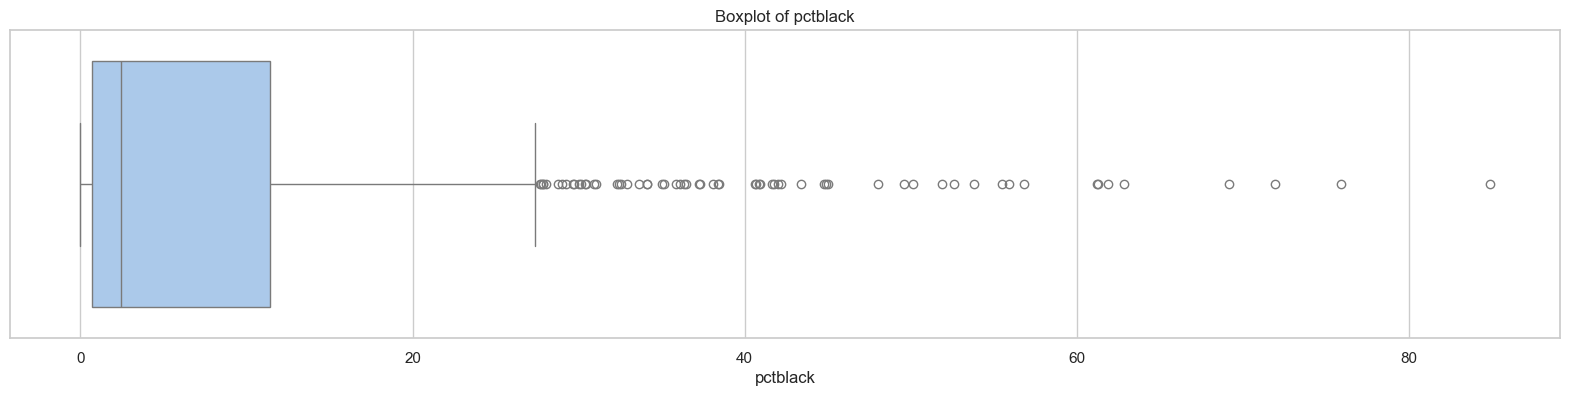

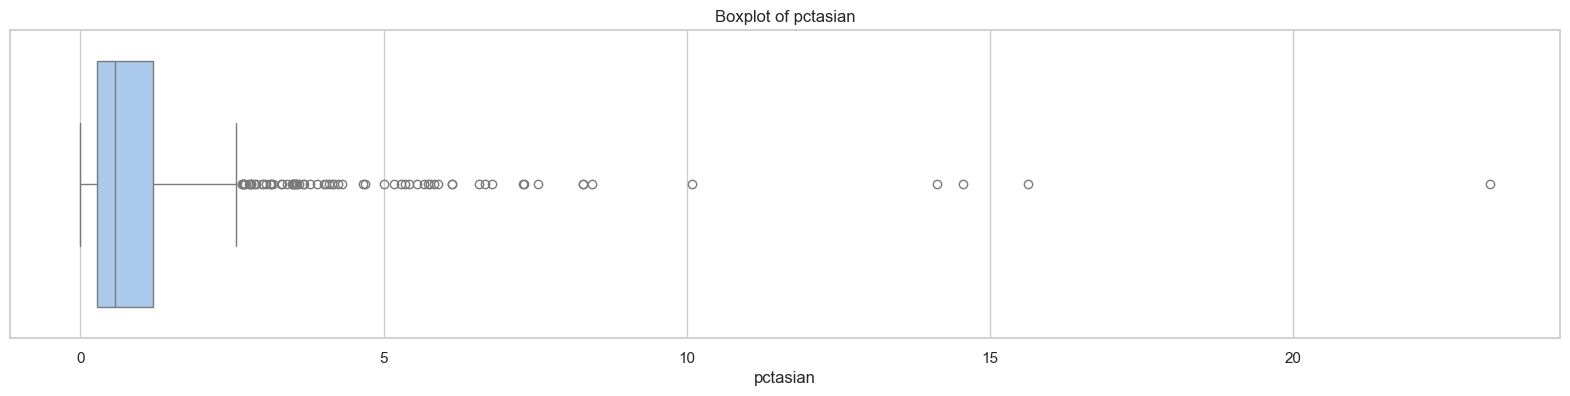

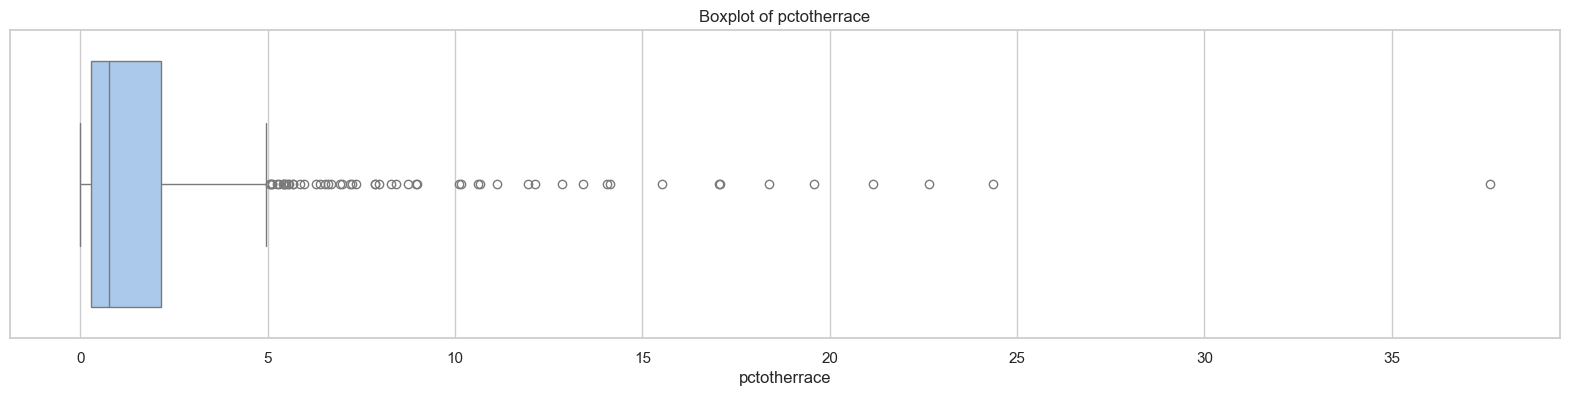

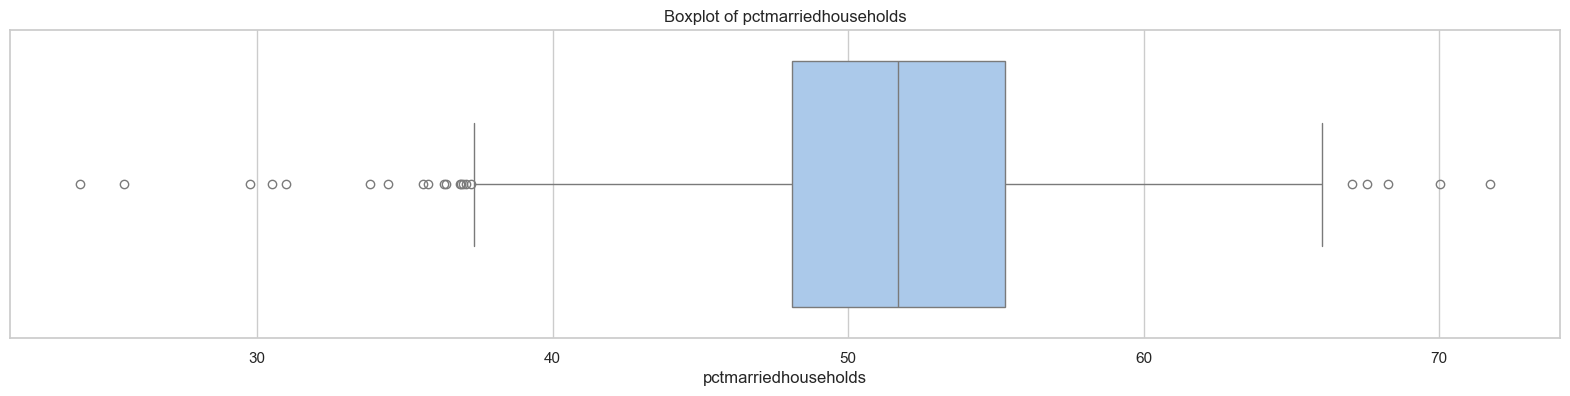

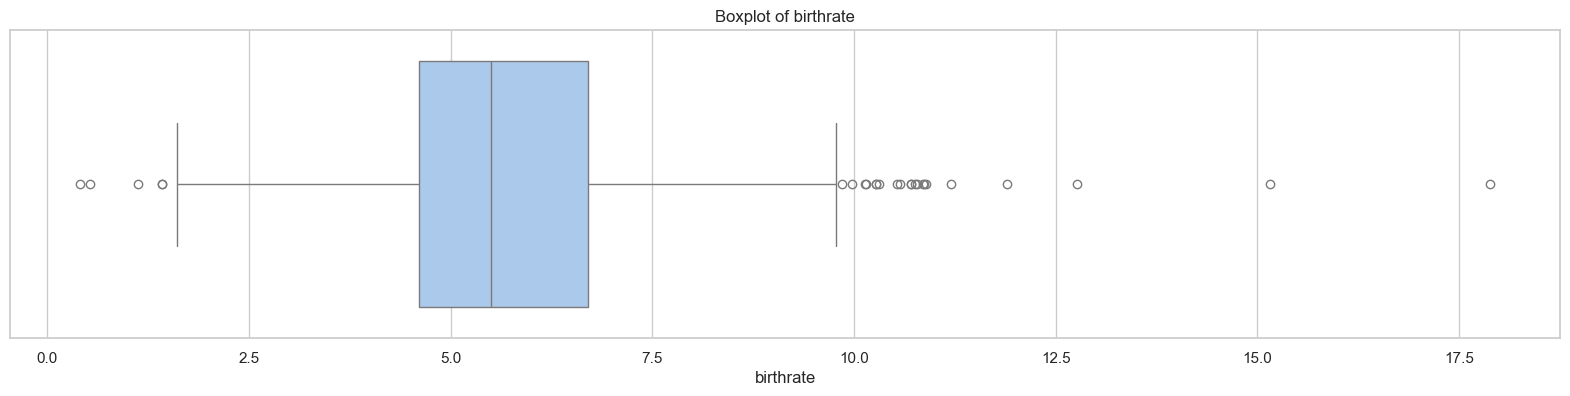

In [38]:
# sns.boxplot(x=data['fixed acidity'])
# plt.title('Boxplot of Fixed Acidity')
# plt.show()

sns.set(style="whitegrid", palette="pastel")
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=data, orient="h")
# plt.title('Boxplot of Wine Quality Features')
# plt.show()                                            # на одном графике не очень видно
# Создаем графики для каждого признака
for feature in data.columns:
    plt.figure(figsize=(20, 4))  # Размер каждого графика
    sns.boxplot(x=data[feature], orient="h")  # Создаем boxplot для текущего признака
    plt.title('Boxplot of {}'.format(feature))  # Заголовок графика
    plt.show()  # Показываем график

In [39]:
#13. Построить модели и обучить их. Подбор значений гиперпараметров можно выполнить вручную либо с использованием библиотек Optuna, GridSearch и т.д.
#14. Рассчитать значения метрик
from sklearn.utils import shuffle

# Перемешиваем данные
# shuffled_data = shuffle(data, random_state=42)

X = data.drop(columns=['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate'])
y = data['avgdeathsperyear']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   # Разделение данных на обучающий и тестовый наборы


model = LinearRegression()  # Создание и обучение линейной модели
model.fit(X_train, y_train)

y_pred = model.predict(X_test)  # Прогнозирование на тестовом наборе

In [40]:
param_grid_tree = {'max_depth': range(1, 20)} # Определяем диапазон гиперпараметров, которые мы хотим перебрать
grid_search_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree, cv=3)# Создаем экземпляр GridSearchCV с моделью дерева и определенным диапазоном параметров
grid_search_tree.fit(X_train, y_train)# Запускаем поиск по сетке                                    # neg_root_mean_squared_error
#CV при увелечении не 
params_tree = grid_search_tree.best_params_
print("Значение гиперпараметра для дерева:", params_tree)

# для дерева максильная глубина дерева

tree_model = DecisionTreeRegressor(max_depth=params_tree['max_depth'], random_state=42) # Создаем модель дерева

tree_model.fit(X_train, y_train) # Обучаем модель 
tree_y_pred = tree_model.predict(X_test)  # Прогнозирование на тестовом наборе


Значение гиперпараметра для дерева: {'max_depth': 8}


In [41]:
param_grid_knn = {'n_neighbors': range(1, 20)}  # Определяем диапазон гиперпараметров, которые мы хотим перебрать
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=3)# Создаем экземпляр GridSearchCV с моделью KNN и определенным диапазоном параметров
grid_search_knn.fit(X_train, y_train)# Запускаем поиск по сетке             # neg_root_mean_squared_error
params_knn = grid_search_knn.best_params_
print("Значение гиперпараметра для KNN:", params_knn)
# для соседей соотвственно их число
knn_model = KNeighborsRegressor(n_neighbors=params_knn['n_neighbors'])# Создаем модель KNN
knn_model.fit(X_train, y_train)# Обучаем модель на всем обучающем наборе
knn_y_pred = knn_model.predict(X_test) # Прогнозирование на тестовом наборе

Значение гиперпараметра для KNN: {'n_neighbors': 1}


MSE для линейная модель: 4364.959911123995
MSE для дерево: 2691.650686962837
MSE для KNN: 4050.691011235955

MAE для линейная модель: 45.29225092597663
MAE для дерево: 25.652348279110853
 для KNN: 31.65730337078652

RMSE для линейная модель: 66.06784324559108
RMSE для дерево: 51.88112071806889
RMSE для KNN: 63.64503917223993

R^2 для линейной модели: 0.8498548803299765
R^2 для дерева: 0.907413075324243
R^2 для KNN: 0.8606650464123737
      тестовые  предсказанные
2653        43      32.142857
3033         7       6.416667
1050       340     450.000000
827        318     319.714286
2473        17      12.034483
...        ...            ...
529         35      40.142857
2646        87      83.750000
3046        48      64.125000
2528        40      38.562500
2826        15      12.034483

[178 rows x 2 columns]


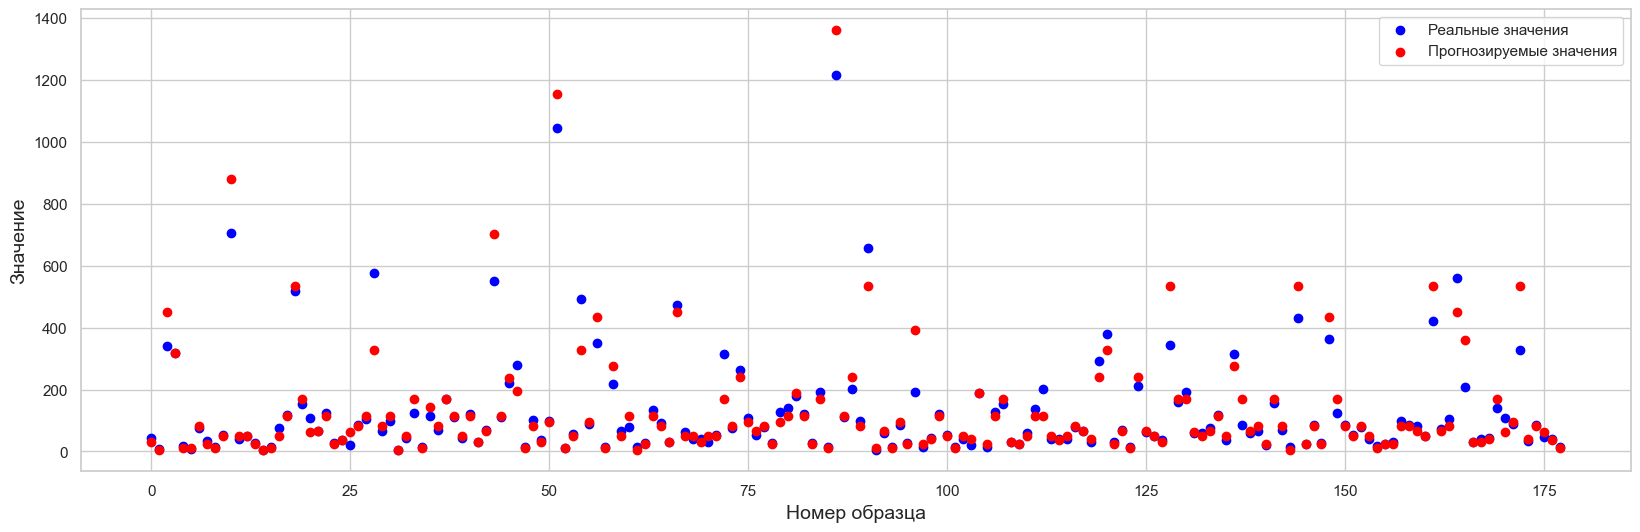

In [42]:
#15. Проанализировать полученные результаты обучения, выбрав наилучшую модель. Обосновать выбор.
# Оценка производительности модели на тестовых наборах с использованием MSE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
#                                                                                  MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE для линейная модель:", mse)

tree_mse = (mean_squared_error(y_test, tree_y_pred))
print("MSE для дерево:", tree_mse)

knn_mse = (mean_squared_error(y_test, knn_y_pred))
print("MSE для KNN:", knn_mse)

print()                                                                        
rmse = mean_absolute_error(y_test, y_pred)
print("MAE для линейная модель:", rmse)

tree_rmse = mean_absolute_error(y_test, tree_y_pred)
print("MAE для дерево:", tree_rmse)

knn_rmse = mean_absolute_error(y_test, knn_y_pred)
print(" для KNN:", knn_rmse)
#                                                                              MRS
print()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE для линейная модель:", rmse)

tree_rmse = np.sqrt(mean_squared_error(y_test, tree_y_pred))
print("RMSE для дерево:", tree_rmse)

knn_rmse = np.sqrt(mean_squared_error(y_test, knn_y_pred))
print("RMSE для KNN:", knn_rmse)

print()
# Оценка производительности модели на тестовых наборах с использованием R^2
r2_linear = r2_score(y_test, y_pred)
print("R^2 для линейной модели:", r2_linear)

tree_r2 = r2_score(y_test, tree_y_pred)
print("R^2 для дерева:", tree_r2)

knn_r2 = r2_score(y_test, knn_y_pred)
print("R^2 для KNN:", knn_r2)


d1= pd.DataFrame({'тестовые': y_test, 'предсказанные':tree_y_pred})
d1.head(15)
print(d1)
# print(y_test[:20])
# print(tree_y_pred[:20])


# Построение графика реальных точек и прямой прогноза
plt.figure(figsize=(20, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Реальные значения')
# plt.plot(y_test, color='blue', label='Реальные значения')
plt.scatter(range(len(y_test)),tree_y_pred, color='red', label='Прогнозируемые значения')
plt.xlabel('Номер образца', fontsize=14)
plt.ylabel('Значение', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()